# Notes

* The agency uses it to screen for areas that may be candidates for additional consideration, analysis or outreach as EPA develops programs, policies and activities that may affect communities. 

* Can we use other factors like air pollution, PM, traffic, lead, race,... to predict Cancer and other disease risk likelihood?

* RSEI model for ideas (has data, can train a model to predict RSEI scores)

* Times series to predict future scores in a region 

* Read the Limitation and caveats

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# EJScreen

In [14]:
df = pd.read_csv('EJSCREEN_2023_BG_with_AS_CNMI_GU_VI.csv', encoding='latin-1', low_memory=False)

In [15]:
df.head()

,OID_,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,...,T_D2_PWDIS,T_D5_PWDIS,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,EXCEED_COUNT_80,EXCEED_COUNT_80_SUP,Shape_Length,Shape_Area
0,1,10010201001,Alabama,AL,Autauga County,4,693.0,693.0,489.0,252.0,...,69 %ile,85 %ile,4264299.0,28435.0,0.0,0.0,2.0,4.0,13436.899280,6047647.376
1,2,10010201002,Alabama,AL,Autauga County,4,1098.0,1098.0,736.0,357.0,...,55 %ile,69 %ile,5561005.0,0.0,0.0,0.0,0.0,2.0,11951.835190,7837850.269
2,3,10010202001,Alabama,AL,Autauga County,4,844.0,808.0,523.0,272.0,...,88 %ile,81 %ile,2058374.0,0.0,0.0,0.0,5.0,4.0,7770.915673,2900764.866
3,4,10010202002,Alabama,AL,Autauga County,4,1166.0,958.0,957.0,328.0,...,84 %ile,76 %ile,1262444.0,5669.0,0.0,0.0,5.0,2.0,6500.548572,1786491.318
4,5,10010203001,Alabama,AL,Autauga County,4,2685.0,2685.0,1839.0,947.0,...,30 %ile,22 %ile,3866513.0,9054.0,0.0,0.0,0.0,0.0,11070.368720,5461598.433


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243021 entries, 0 to 243020
Columns: 224 entries, OID_ to Shape_Area
dtypes: float64(169), int64(3), object(52)
memory usage: 415.3+ MB


In [176]:
state_df['Shape_Area']

0         6.047647e+06
1         7.837850e+06
2         2.900765e+06
3         1.786491e+06
4         5.461598e+06
              ...     
243016    3.135909e+04
243017    1.658312e+06
243018    2.038743e+06
243019    5.319196e+05
243020    3.359877e+08
Name: Shape_Area, Length: 243021, dtype: float64

In [19]:
col_names = df.columns

In [40]:
df['STATE_NAME'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Virgin Islands', 'Northern Mariana Is', 'American Samoa', 'Guam'],
      dtype=object)

In [35]:
cal_df = df[df['STATE_NAME']=='California']
ny_df = df[df['STATE_NAME']=='New York']

In [42]:
ny_df.head()

,OID_,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,...,T_D2_PWDIS,T_D5_PWDIS,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,EXCEED_COUNT_80,EXCEED_COUNT_80_SUP,Shape_Length,Shape_Area
141250,141251,360010001001,New York,NY,Albany County,2,894.0,842.0,627.0,406.0,...,79 %ile,77 %ile,2010584.0,245021.0,0.0,1.0,6.0,7.0,11033.745340,4.174319e+06
141251,141252,360010001002,New York,NY,Albany County,2,1321.0,1314.0,574.0,419.0,...,88 %ile,91 %ile,356872.0,0.0,0.0,0.0,8.0,9.0,3193.041281,6.605656e+05
141252,141253,360010002011,New York,NY,Albany County,2,327.0,327.0,196.0,184.0,...,85 %ile,73 %ile,206621.0,0.0,0.0,0.0,8.0,5.0,3480.744815,3.822830e+05
141253,141254,360010002012,New York,NY,Albany County,2,1448.0,1448.0,925.0,500.0,...,90 %ile,86 %ile,216941.0,0.0,0.0,0.0,9.0,9.0,3746.453458,4.013577e+05
141254,141255,360010002013,New York,NY,Albany County,2,1115.0,1115.0,765.0,538.0,...,82 %ile,67 %ile,192305.0,0.0,0.0,0.0,8.0,5.0,3594.947683,3.557588e+05


In [46]:
[name for name in col_names]

['OID_',
 'ID',
 'STATE_NAME',
 'ST_ABBREV',
 'CNTY_NAME',
 'REGION',
 'ACSTOTPOP',
 'ACSIPOVBAS',
 'ACSEDUCBAS',
 'ACSTOTHH',
 'ACSTOTHU',
 'ACSUNEMPBAS',
 'DEMOGIDX_2',
 'DEMOGIDX_5',
 'PEOPCOLOR',
 'PEOPCOLORPCT',
 'LOWINCOME',
 'LOWINCPCT',
 'UNEMPLOYED',
 'UNEMPPCT',
 'LINGISO',
 'LINGISOPCT',
 'LESSHS',
 'LESSHSPCT',
 'UNDER5',
 'UNDER5PCT',
 'OVER64',
 'OVER64PCT',
 'LIFEEXPPCT',
 'PM25',
 'OZONE',
 'DSLPM',
 'CANCER',
 'RESP',
 'RSEI_AIR',
 'PTRAF',
 'PRE1960',
 'PRE1960PCT',
 'PNPL',
 'PRMP',
 'PTSDF',
 'UST',
 'PWDIS',
 'D2_PM25',
 'D5_PM25',
 'D2_OZONE',
 'D5_OZONE',
 'D2_DSLPM',
 'D5_DSLPM',
 'D2_CANCER',
 'D5_CANCER',
 'D2_RESP',
 'D5_RESP',
 'D2_RSEI_AIR',
 'D5_RSEI_AIR',
 'D2_PTRAF',
 'D5_PTRAF',
 'D2_LDPNT',
 'D5_LDPNT',
 'D2_PNPL',
 'D5_PNPL',
 'D2_PRMP',
 'D5_PRMP',
 'D2_PTSDF',
 'D5_PTSDF',
 'D2_UST',
 'D5_UST',
 'D2_PWDIS',
 'D5_PWDIS',
 'P_DEMOGIDX_2',
 'P_DEMOGIDX_5',
 'P_PEOPCOLORPCT',
 'P_LOWINCPCT',
 'P_UNEMPPCT',
 'P_LINGISOPCT',
 'P_LESSHSPCT',
 'P_UNDER5PCT'

In [58]:
ny_df_rel = ny_df[['CNTY_NAME', 'PEOPCOLORPCT', 'RSEI_AIR', 'PM25', 'OZONE', 'CANCER']]

In [59]:
ny_df_rel.head()

,CNTY_NAME,PEOPCOLORPCT,RSEI_AIR,PM25,OZONE,CANCER
141250,Albany County,0.672260,153.890801,7.135225,55.1537,20.0
141251,Albany County,0.839516,155.280719,7.135225,55.1537,20.0
141252,Albany County,0.837920,205.584993,7.142925,55.0232,20.0
141253,Albany County,0.928867,214.418867,7.142925,55.0232,20.0
141254,Albany County,0.708520,236.359999,7.142925,55.0232,20.0


In [77]:
ny_df_rel['CNTY_NAME'].nunique()

62

In [87]:
ny_df_rel['CNTY_NAME'] = ny_df_rel['CNTY_NAME'].apply(lambda x: x.split()[0])

/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_26367/1326717845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df_rel['ct_name'] = ny_df_rel['CNTY_NAME'].apply(lambda x: x.split()[0])


In [102]:
ny_df_rel.describe()

,PEOPCOLORPCT,RSEI_AIR,PM25,OZONE,CANCER
count,16070.000000,15834.000000,16053.000000,16053.000000,16011.000000
mean,0.418448,451.645215,7.706148,62.576475,24.977828
std,0.346377,1609.226562,0.891645,5.827896,6.976659
min,0.000000,0.000000,5.089360,50.674930,10.000000
25%,0.104022,103.393301,6.906158,57.741510,20.000000
50%,0.318644,245.459275,7.868506,63.915660,20.000000
75%,0.750440,411.094190,8.502541,67.111560,30.000000
max,1.000000,97684.455080,9.017454,77.192060,80.000000


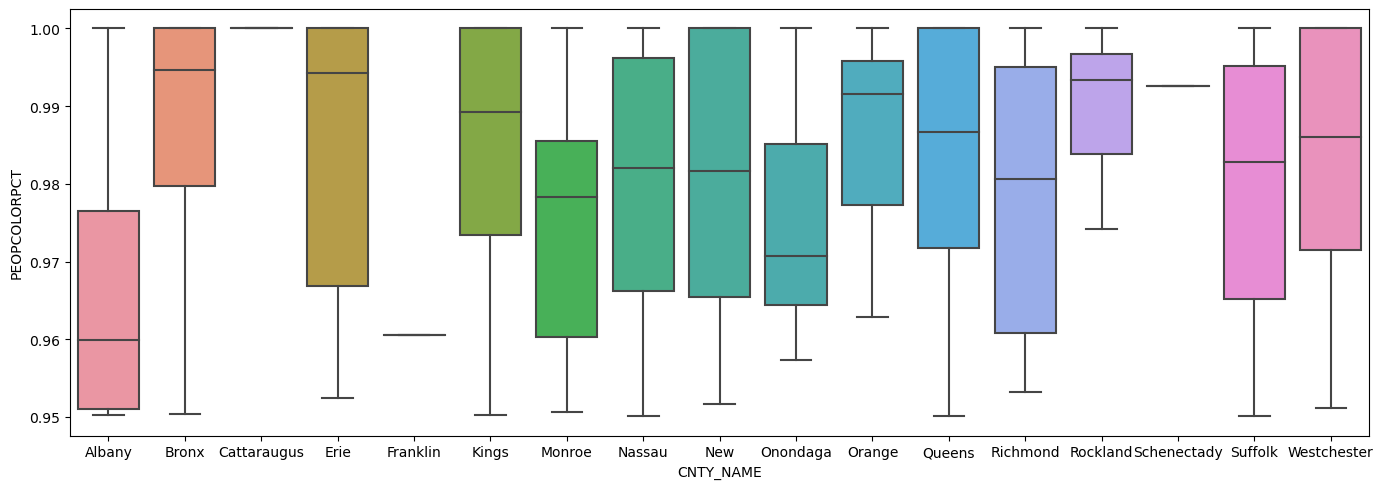

In [185]:
plt.figure(figsize=(14,5))
sns.boxplot(data=ny_df_rel[ny_df_rel['PEOPCOLORPCT']>0.95], x='CNTY_NAME', y='PEOPCOLORPCT')
plt.tight_layout()

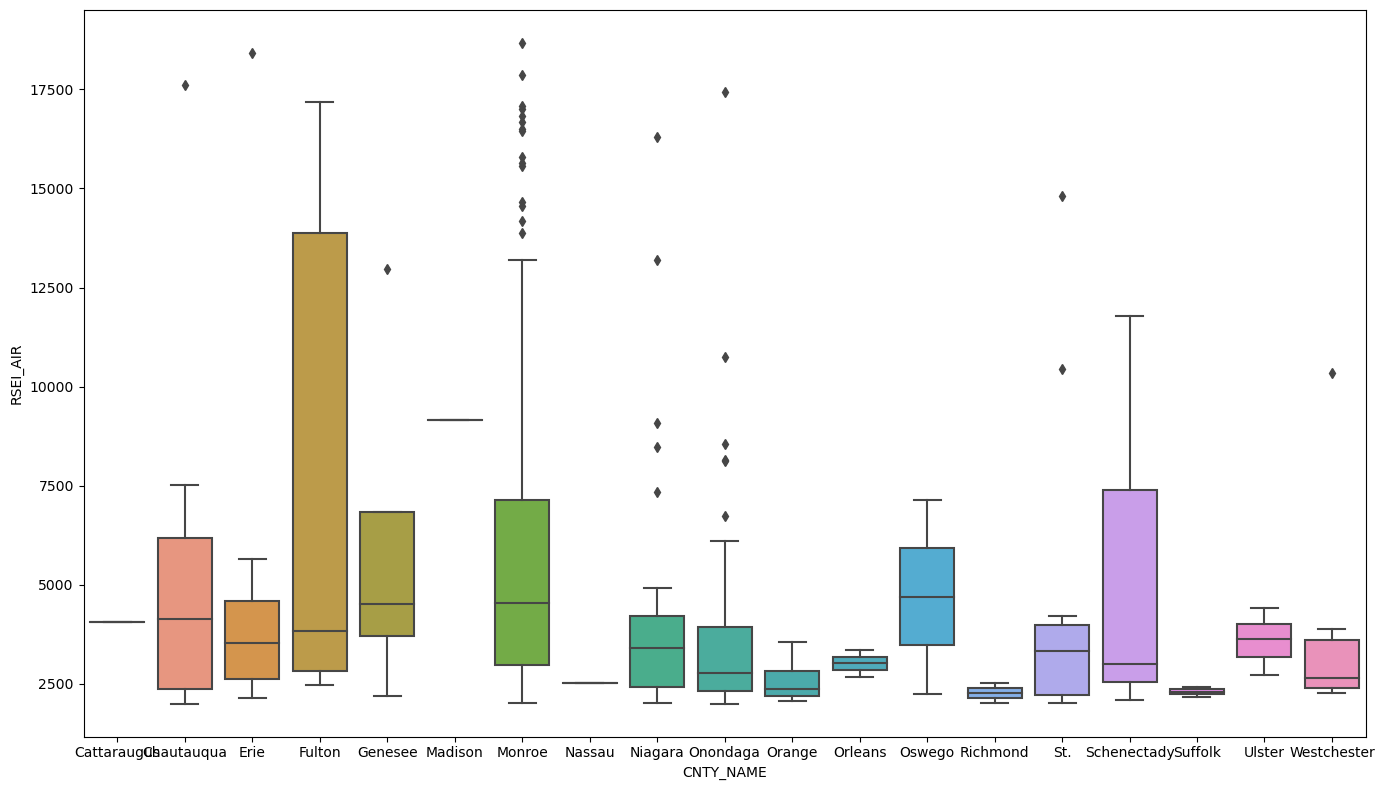

In [118]:
plt.figure(figsize=(14,8))
sns.boxplot(data=ny_df_rel[(ny_df_rel['RSEI_AIR'] > 2000) & (ny_df_rel['RSEI_AIR'] < 20000)], x='CNTY_NAME', y='RSEI_AIR')
plt.tight_layout()

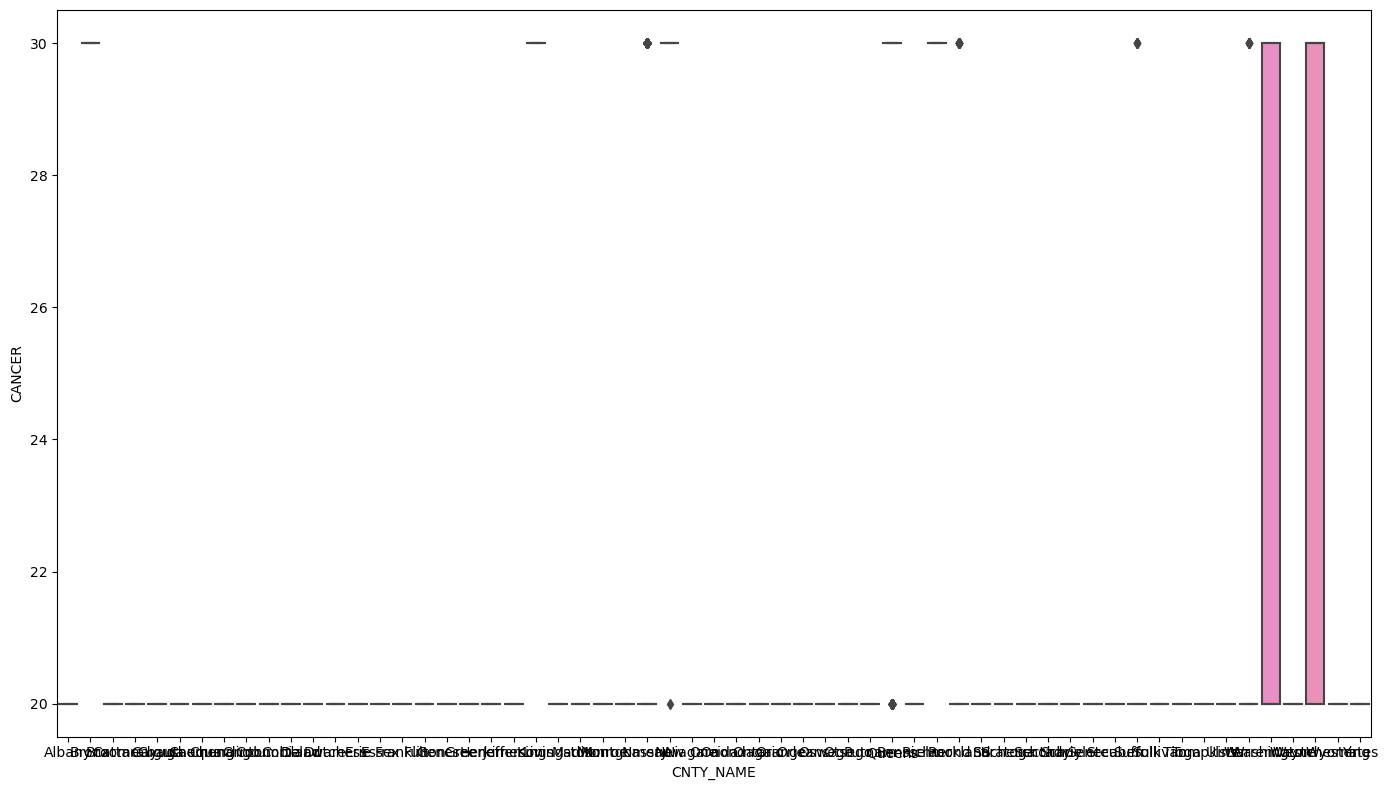

In [123]:
plt.figure(figsize=(14,8))
sns.boxplot(data=ny_df_rel[(ny_df_rel['CANCER'] > 12) & (ny_df_rel['CANCER'] < 40)], x='CNTY_NAME', y='CANCER')
plt.tight_layout()

<Axes: xlabel='PEOPCOLORPCT', ylabel='RSEI_AIR'>

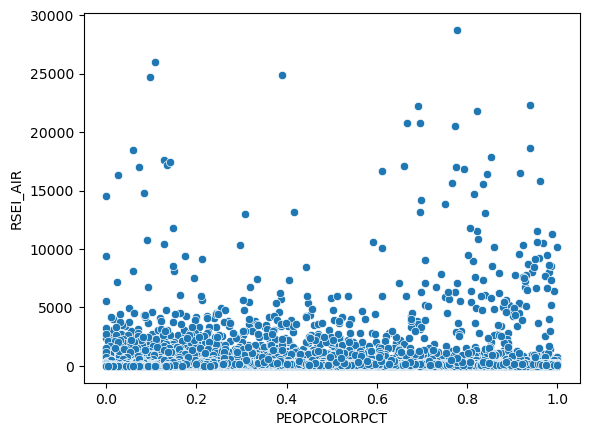

In [127]:
sns.scatterplot(data=ny_df_rel[ny_df_rel['RSEI_AIR']<30000], x='PEOPCOLORPCT', y='RSEI_AIR')

In [134]:
ny_df_rel['log_rsei_air'] = ny_df_rel['RSEI_AIR'].apply(lambda x: np.log(x))

/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_26367/278065059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df_rel['log_rsei_air'] = ny_df_rel['RSEI_AIR'].apply(lambda x: np.log(x))


<Axes: xlabel='PEOPCOLORPCT', ylabel='log_rsei_air'>

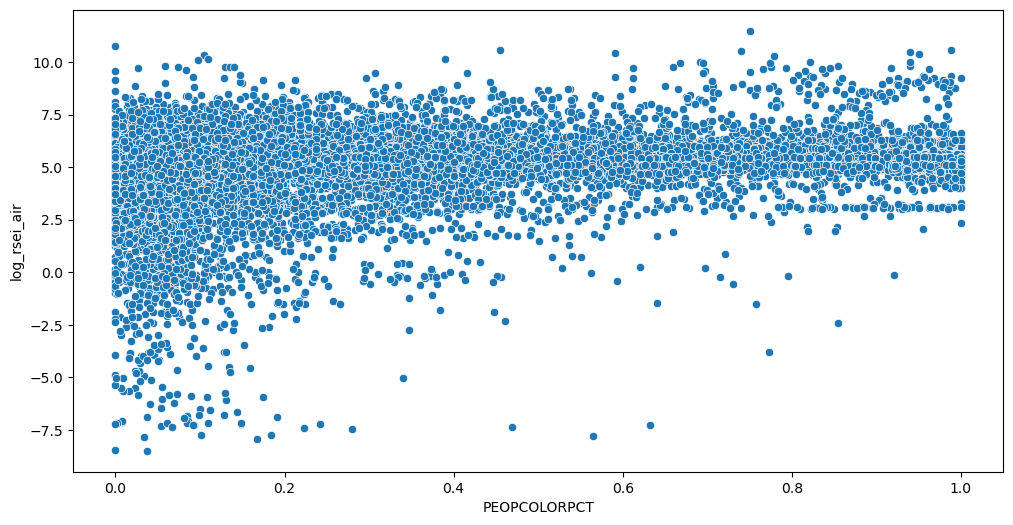

In [140]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=ny_df_rel, x='PEOPCOLORPCT', y='log_rsei_air')

<Axes: xlabel='CANCER', ylabel='log_rsei_air'>

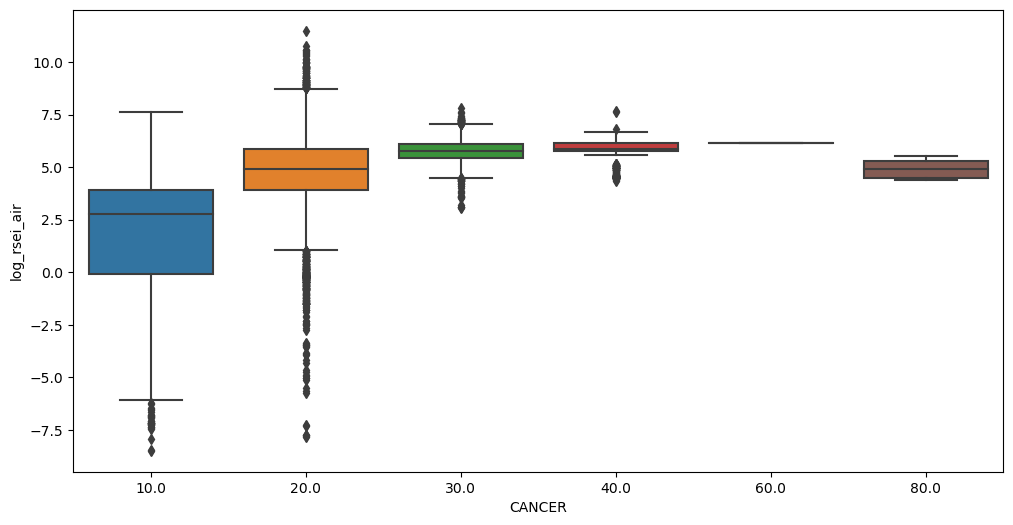

In [142]:
plt.figure(figsize=(12,6))
sns.boxplot(data=ny_df_rel, x='CANCER', y='log_rsei_air')

<Axes: xlabel='PEOPCOLORPCT', ylabel='PM25'>

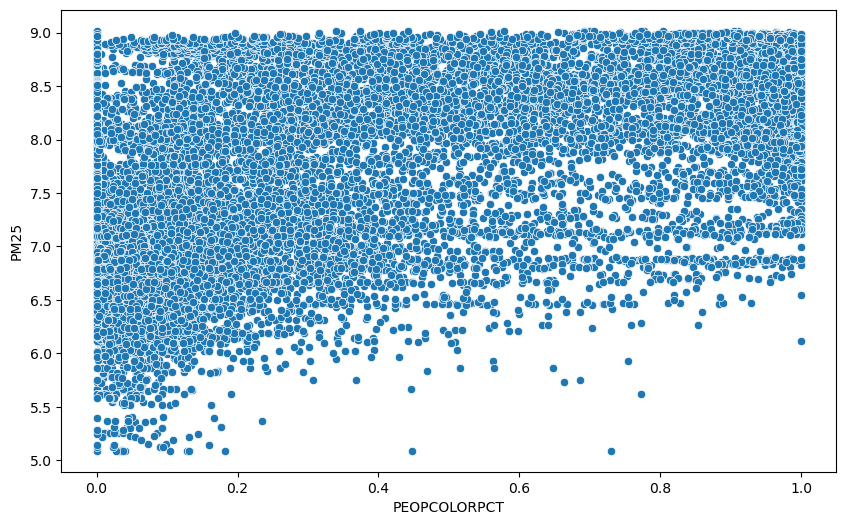

In [153]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ny_df_rel, x='PEOPCOLORPCT', y='PM25')

In [155]:
state_df = pd.read_csv('EJSCREEN_2023_BG_StatePct_with_AS_CNMI_GU_VI.csv', encoding='latin-1', low_memory=False)

In [158]:
state_df.head(5)

,OID_,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,...,T_D2_PWDIS,T_D5_PWDIS,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,EXCEED_COUNT_80,EXCEED_COUNT_80_SUP,Shape_Length,Shape_Area
0,1,10010201001,Alabama,AL,Autauga County,4,693.0,693.0,489.0,252.0,...,70 %ile,85 %ile,4264299.0,28435.0,0,0,0,4.0,13436.899280,6047647.376
1,2,10010201002,Alabama,AL,Autauga County,4,1098.0,1098.0,736.0,357.0,...,55 %ile,65 %ile,5561005.0,0.0,0,0,0,2.0,11951.835190,7837850.269
2,3,10010202001,Alabama,AL,Autauga County,4,844.0,808.0,523.0,272.0,...,88 %ile,79 %ile,2058374.0,0.0,0,0,5,4.0,7770.915673,2900764.866
3,4,10010202002,Alabama,AL,Autauga County,4,1166.0,958.0,957.0,328.0,...,85 %ile,73 %ile,1262444.0,5669.0,0,0,4,2.0,6500.548572,1786491.318
4,5,10010203001,Alabama,AL,Autauga County,4,2685.0,2685.0,1839.0,947.0,...,26 %ile,17 %ile,3866513.0,9054.0,0,0,0,0.0,11070.368720,5461598.433


In [160]:
[name for name in col_names]

['OID_',
 'ID',
 'STATE_NAME',
 'ST_ABBREV',
 'CNTY_NAME',
 'REGION',
 'ACSTOTPOP',
 'ACSIPOVBAS',
 'ACSEDUCBAS',
 'ACSTOTHH',
 'ACSTOTHU',
 'ACSUNEMPBAS',
 'DEMOGIDX_2',
 'DEMOGIDX_5',
 'PEOPCOLOR',
 'PEOPCOLORPCT',
 'LOWINCOME',
 'LOWINCPCT',
 'UNEMPLOYED',
 'UNEMPPCT',
 'LINGISO',
 'LINGISOPCT',
 'LESSHS',
 'LESSHSPCT',
 'UNDER5',
 'UNDER5PCT',
 'OVER64',
 'OVER64PCT',
 'LIFEEXPPCT',
 'PM25',
 'OZONE',
 'DSLPM',
 'CANCER',
 'RESP',
 'RSEI_AIR',
 'PTRAF',
 'PRE1960',
 'PRE1960PCT',
 'PNPL',
 'PRMP',
 'PTSDF',
 'UST',
 'PWDIS',
 'D2_PM25',
 'D5_PM25',
 'D2_OZONE',
 'D5_OZONE',
 'D2_DSLPM',
 'D5_DSLPM',
 'D2_CANCER',
 'D5_CANCER',
 'D2_RESP',
 'D5_RESP',
 'D2_RSEI_AIR',
 'D5_RSEI_AIR',
 'D2_PTRAF',
 'D5_PTRAF',
 'D2_LDPNT',
 'D5_LDPNT',
 'D2_PNPL',
 'D5_PNPL',
 'D2_PRMP',
 'D5_PRMP',
 'D2_PTSDF',
 'D5_PTSDF',
 'D2_UST',
 'D5_UST',
 'D2_PWDIS',
 'D5_PWDIS',
 'P_DEMOGIDX_2',
 'P_DEMOGIDX_5',
 'P_PEOPCOLORPCT',
 'P_LOWINCPCT',
 'P_UNEMPPCT',
 'P_LINGISOPCT',
 'P_LESSHSPCT',
 'P_UNDER5PCT'

In [178]:
tracts_df = pd.read_csv('EJSCREEN_2023_Tracts_with_AS_CNMI_GU_VI.csv', encoding='latin-1', low_memory=False)

In [183]:
df['D2_CANCER']

0         25.025974
1         16.736794
2         48.938852
3         41.618656
4         21.758287
            ...    
243016          NaN
243017          NaN
243018          NaN
243019          NaN
243020          NaN
Name: D2_CANCER, Length: 243021, dtype: float64

# RSEI

In [3]:
rsei_df = pd.read_excel('Data.xlsx')

In [4]:
df.head()

,Submission Year,TRI Facility ID,County,FIPS,EPA Region,Chemical,RSEI Score,RSEI Score-Cancer,RSEI Modeled Hazard
0,2016,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,9233.597928,4360.2500,3478400.0
1,2014,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,8850.18936,4179.1406,3467000.0
2,2013,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,4785.87307,2259.9084,1963000.0
3,2012,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,4693.821406,2216.3651,2157000.0
4,2013,94089QLTKD1274F,"SANTA CLARA, CA",6085,9,Lead and lead compounds,3133.97,1479.9300,13122000.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Submission Year      5734 non-null   int64  
 1   TRI Facility ID      5734 non-null   object 
 2   County               5734 non-null   object 
 3   FIPS                 5734 non-null   int64  
 4   EPA Region           5734 non-null   int64  
 5   Chemical             5734 non-null   object 
 6   RSEI Score           5734 non-null   object 
 7   RSEI Score-Cancer    5734 non-null   float64
 8   RSEI Modeled Hazard  5734 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 403.3+ KB


In [8]:
df['Chemical'].value_counts()

Lead and lead compounds    5002
1,2,4-Trimethylbenzene      732
Name: Chemical, dtype: int64

<Axes: xlabel='Submission Year', ylabel='RSEI Score-Cancer'>

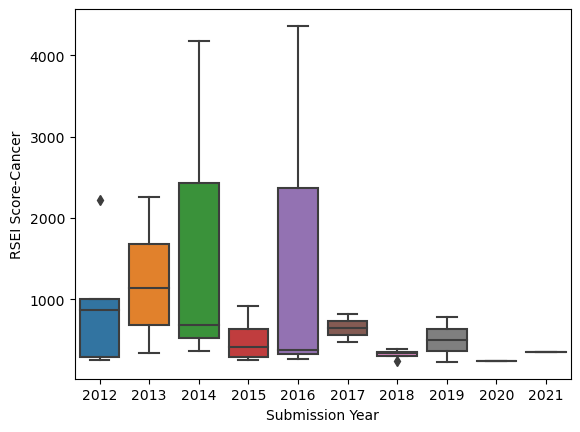

In [49]:
sns.boxplot(data=df[df['RSEI Score-Cancer']>200], x='Submission Year', y='RSEI Score-Cancer')

<Axes: xlabel='RSEI Score-Cancer', ylabel='Count'>

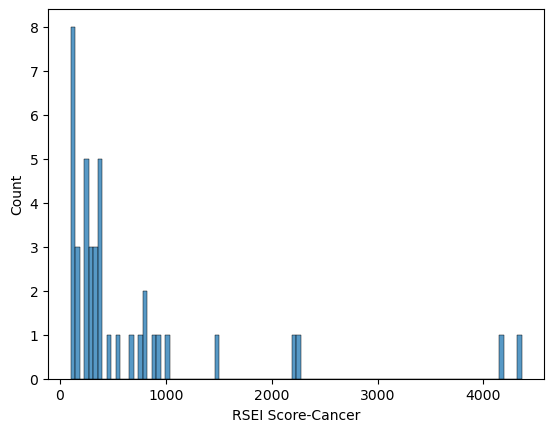

In [42]:
sns.histplot(df[df['RSEI Score-Cancer']>100]['RSEI Score-Cancer'], bins=100)

In [29]:
df[df['RSEI Score-Cancer']>500]

,Submission Year,TRI Facility ID,County,FIPS,EPA Region,Chemical,RSEI Score,RSEI Score-Cancer,RSEI Modeled Hazard
0,2016,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,9233.597928,4360.250000,3478400.00
1,2014,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,8850.18936,4179.140600,3467000.00
2,2013,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,4785.87307,2259.908400,1963000.00
3,2012,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,4693.821406,2216.365100,2157000.00
4,2013,94089QLTKD1274F,"SANTA CLARA, CA",6085,9,Lead and lead compounds,3133.97,1479.930000,13122000.00
5,2012,95050SGMCR393MA,"SANTA CLARA, CA",6085,9,Lead and lead compounds,2139.021363,1007.984221,460569.80
6,2015,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,1947.603639,919.630000,891600.00
7,2012,94089QLTKD1274F,"SANTA CLARA, CA",6085,9,Lead and lead compounds,1848.691,872.991000,7757999.20
8,2017,93243NTNLCSTATE,"KERN, CA",6029,9,Lead and lead compounds,1740.435626,821.805000,805800.00
9,2013,95050SGMCR393MA,"SANTA CLARA, CA",6085,9,Lead and lead compounds,1693.666907,797.666114,358690.10
